# Auto encoders 

Author: Gabriel Rodrigues Palma

additional source: DataCamp and MIT introduction to Deep Learning

## Loading the packages

In [55]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [68]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

## Loading the data and visualizing it

In [9]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

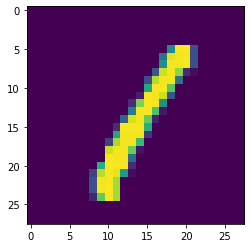

In [19]:
plt.imshow(x_train[3, :, :])

In [48]:
reshaped_x_train = x_train.reshape(60000, 28 *28)
reshaped_x_train.shape
reshaped_x_test = x_test.reshape(10000, 28 *28)
reshaped_x_test.shape

(10000, 784)

## Creating important fnuctions

In [58]:
def show_encodings(encoded_imgs,number=1):
    n = 5  # how many digits we will display
    original = reshaped_x_test
    original = original[np.where(y_test == number)]
    encoded_imgs = encoded_imgs[np.where(y_test==number)]
    plt.figure(figsize=(20, 4))
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
def compare_plot(original,decoded_imgs):
    n = 4  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Real vs Decoded images')
    plt.show()

In [75]:
def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()

In [76]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

## Implementing auto encoders with MNIST data

In [61]:
# Start with a sequential model
autoencoder = Sequential()

# Add a dense layer with input the original image pixels and neurons the encoded representation
autoencoder.add(Dense(32, input_shape=(784, ), activation="relu"))

# Add an output layer with as many neurons as the orginal image pixels
autoencoder.add(Dense(784, activation = "sigmoid"))

# Compile your model with adadelta
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = 'accuracy')

# Summarize your model structure
autoencoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [62]:
reshaped_x_train.shape

(60000, 784)

In [63]:
# training the model
autoencoder.fit(reshaped_x_train, reshaped_x_train, epochs=1000)

Epoch 1/1000
  30/1875 [..............................] - ETA: 6s - loss: 0.6938 - accuracy: 0.0021    

2022-06-02 16:35:36.203914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6929 - accuracy: 0.0020
Epoch 2/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6910 - accuracy: 0.0020
Epoch 3/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6891 - accuracy: 0.0021
Epoch 4/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6870 - accuracy: 0.0020
Epoch 5/1000
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6846 - accuracy: 0.0020
Epoch 6/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6816 - accuracy: 0.0020
Epoch 7/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6780 - accuracy: 0.0022
Epoch 8/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6736 - accuracy: 0.0021
Epoch 9/1000
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6680 - accuracy: 0.0023
Epoch 10/1000
1875/1875 [==============================] - 6s 3ms/step - loss

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2677 - accuracy: 0.0122
Epoch 157/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2675 - accuracy: 0.0122
Epoch 158/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2674 - accuracy: 0.0123
Epoch 159/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2673 - accuracy: 0.0122
Epoch 160/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.0122
Epoch 161/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2671 - accuracy: 0.0123
Epoch 162/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2669 - accuracy: 0.0123
Epoch 163/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2668 - accuracy: 0.0124
Epoch 164/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2667 - accuracy: 0.0123
Epoch 165/1000
1875/1875 [==============================] - 6

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2438 - accuracy: 0.0138
Epoch 311/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2436 - accuracy: 0.0140
Epoch 312/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2435 - accuracy: 0.0140
Epoch 313/1000
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2433 - accuracy: 0.0141
Epoch 314/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2431 - accuracy: 0.0142
Epoch 315/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2429 - accuracy: 0.0141
Epoch 316/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2428 - accuracy: 0.0142
Epoch 317/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2426 - accuracy: 0.0142
Epoch 318/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2424 - accuracy: 0.0142
Epoch 319/1000
1875/1875 [==============================] - 6

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2201 - accuracy: 0.0149
Epoch 465/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2200 - accuracy: 0.0149
Epoch 466/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2198 - accuracy: 0.0148
Epoch 467/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2197 - accuracy: 0.0148
Epoch 468/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2196 - accuracy: 0.0148
Epoch 469/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2195 - accuracy: 0.0148
Epoch 470/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2193 - accuracy: 0.0148
Epoch 471/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2192 - accuracy: 0.0148
Epoch 472/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2191 - accuracy: 0.0148
Epoch 473/1000
1875/1875 [==============================] - 6

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2036 - accuracy: 0.0112
Epoch 619/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2035 - accuracy: 0.0113
Epoch 620/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2034 - accuracy: 0.0113
Epoch 621/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2034 - accuracy: 0.0112
Epoch 622/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2033 - accuracy: 0.0112
Epoch 623/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2032 - accuracy: 0.0111
Epoch 624/1000
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2031 - accuracy: 0.0111
Epoch 625/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2030 - accuracy: 0.0111
Epoch 626/1000
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2029 - accuracy: 0.0111
Epoch 627/1000
1875/1875 [==============================] - 6

1875/1875 [==============================] - 9s 5ms/step - loss: 0.1919 - accuracy: 0.0115
Epoch 773/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1918 - accuracy: 0.0114
Epoch 774/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1917 - accuracy: 0.0114
Epoch 775/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1917 - accuracy: 0.0113
Epoch 776/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1916 - accuracy: 0.0113
Epoch 777/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1915 - accuracy: 0.0113
Epoch 778/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1915 - accuracy: 0.0113
Epoch 779/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1914 - accuracy: 0.0114
Epoch 780/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1913 - accuracy: 0.0113
Epoch 781/1000
1875/1875 [==============================] - 6

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1827 - accuracy: 0.0118
Epoch 927/1000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1827 - accuracy: 0.0118
Epoch 928/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1826 - accuracy: 0.0118
Epoch 929/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1826 - accuracy: 0.0117
Epoch 930/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1825 - accuracy: 0.0118
Epoch 931/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1825 - accuracy: 0.0118
Epoch 932/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1824 - accuracy: 0.0118
Epoch 933/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1824 - accuracy: 0.0118
Epoch 934/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1823 - accuracy: 0.0118
Epoch 935/1000
1875/1875 [==============================] - 8

In [65]:
autoencoder.save_weights('autoencoder_weights.h5')

2022-06-02 16:32:10.809674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


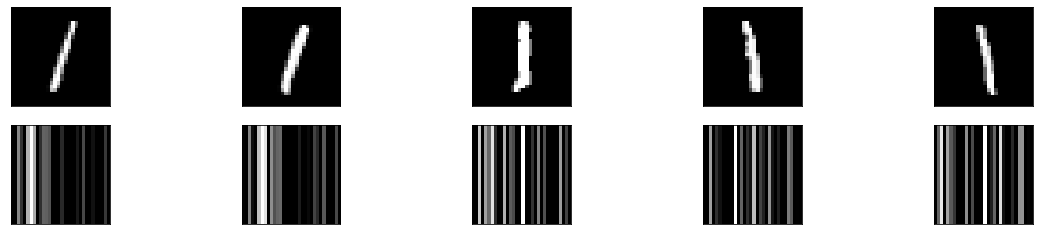

In [56]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict(reshaped_x_test)
show_encodings(encodings, number = 1)

2022-06-02 19:15:53.288023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


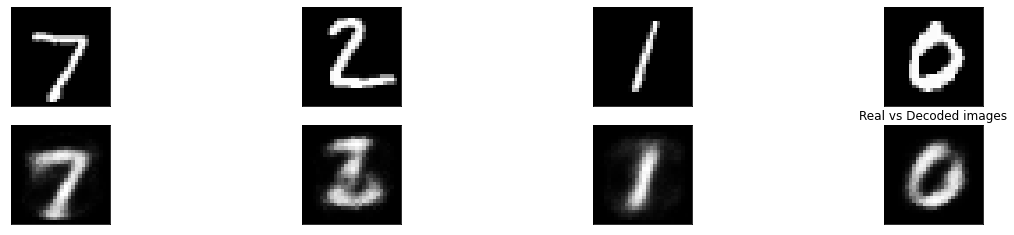

In [66]:
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(reshaped_x_test)

# Plot noisy vs decoded images
compare_plot(reshaped_x_test, decoded_imgs)

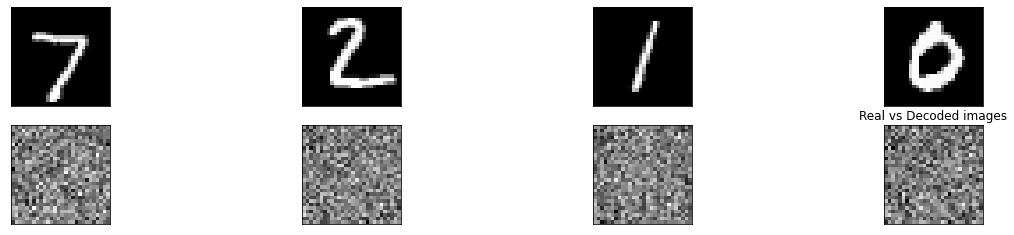

In [60]:
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(reshaped_x_test)

# Plot noisy vs decoded images
compare_plot(reshaped_x_test, decoded_imgs)

# Implementing Variational Auto Encoders with MNIST data

In [69]:
class Sampling(layers.Layer):
    
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

## Creating the VA autoencoders 

#### Build the encoder

In [70]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

#### Build the decoder

In [71]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_11 (Dense)            (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        289 

## Define the VAE as a Model with a custom train_step

In [72]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

## Training the models with MNIST data

In [73]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30


2022-06-02 19:19:30.699705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


547/547 [==============================] - 15s 23ms/step - loss: 259.4795 - reconstruction_loss: 210.3035 - kl_loss: 3.1893
Epoch 2/30
547/547 [==============================] - 13s 23ms/step - loss: 187.3033 - reconstruction_loss: 180.0944 - kl_loss: 4.2052
Epoch 3/30
547/547 [==============================] - 13s 24ms/step - loss: 170.0661 - reconstruction_loss: 161.8464 - kl_loss: 6.2089
Epoch 4/30
547/547 [==============================] - 12s 23ms/step - loss: 162.8852 - reconstruction_loss: 156.0213 - kl_loss: 6.2819
Epoch 5/30
547/547 [==============================] - 13s 23ms/step - loss: 159.8593 - reconstruction_loss: 153.0198 - kl_loss: 6.3279
Epoch 6/30
547/547 [==============================] - 13s 23ms/step - loss: 157.9188 - reconstruction_loss: 151.2953 - kl_loss: 6.3535
Epoch 7/30
547/547 [==============================] - 13s 23ms/step - loss: 156.3984 - reconstruction_loss: 150.1010 - kl_loss: 6.3590
Epoch 8/30
547/547 [==============================] - 12s 23ms/ste

## Plotting the Latent space

2022-06-02 19:26:16.035366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


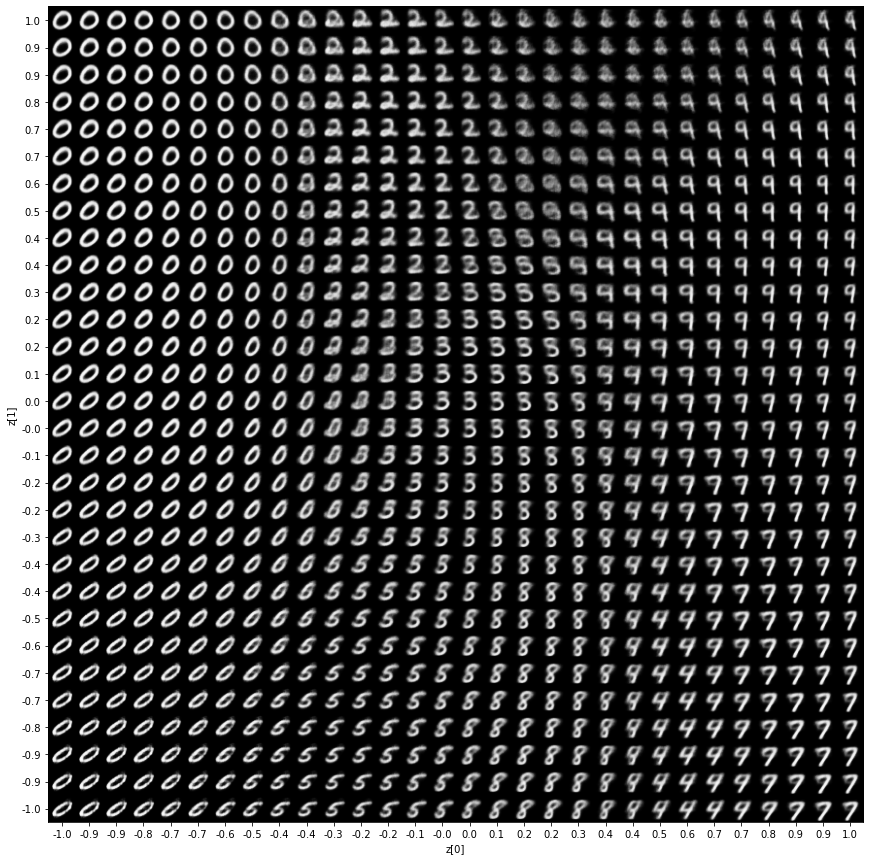

In [77]:
plot_latent_space(vae)

2022-06-02 19:26:43.776990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


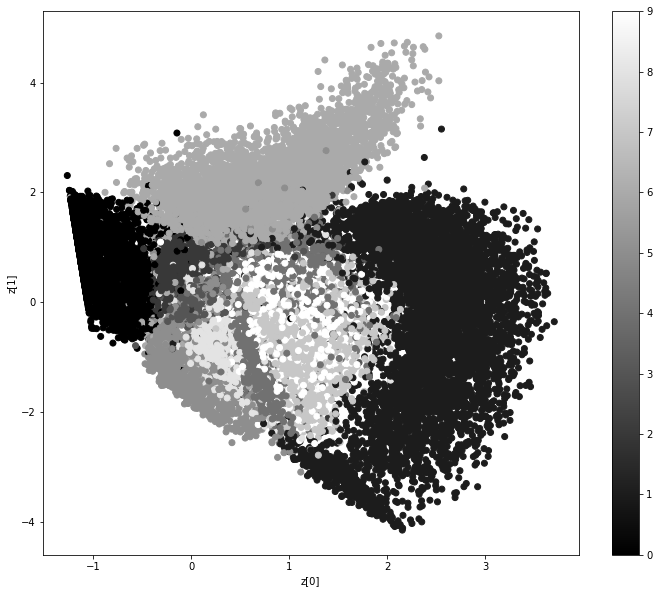

In [78]:
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)